In [1]:
"""
Libraries for generating ROC curves.
"""

import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

plt.rcParams.update({'font.family':'serif'})

In [8]:
# Data from first 8 hours
eight_hour_data = np.array([
    [0.8881537298874638, 0.9920043711708776],
    [0.7782377320118778, 0.9771032088166335],
    [0.6680448871177921, 0.9693838433423106],
    [0.5637375571766842, 0.9299925229651349],
    [0.4619549005498772, 0.8811322886650262],
    [0.36004646818217256, 0.831339478740136],
    [0.2667993994360837, 0.7545846928387553],
    [0.18433143556981446, 0.6341950352953097],
    [0.13238692887286244, 0.5792948283709414],
    [0.09915317957491401, 0.5109161518094841],
    [0.07710978609928813, 0.47350041546349686],
    [0.033732848751042266, 0.32103672707770214],
    [0.03205504418301245, 0.31401833733101736],
    [0.0033636839338103187, 0.022878173525754227],
    [0.00004644981856298502, 0.003561769497837421],
    [0.000006964212336926615, 0.000009501965923984272],
    [0.000006964212336926615, 0.000009501965923984272],
])

# Data from first 16 hours
sixteen_hour_data = np.array([
    [0.881063103418011,0.9928337409378638],
    [0.7800087363531699, 0.9710048686557429],
    [0.6772598812406861, 0.9503169890136509],
    [0.5744780140180843, 0.9205268681356852],
    [0.47679501744982955, 0.8811687402990915],
    [0.38149654458002635, 0.8097733649099519],
    [0.2884652449873895, 0.7402414869240436],
    [0.18892191543563294, 0.6358707983997374],
    [0.11449361611960761, 0.5393184808724383],
    [0.09739886378003167, 0.5016200813905273],
    [0.05855603243176799, 0.4290198202051502],
    [0.03501506451515742, 0.343520024375119],
    [0.029941364079583296, 0.3143062693132853],
    [0.003747275189495149, 0.11374687315243348],
    [0, 0.0019256972869626044],
    [0, 0.00422851233881226],

])

# Data from first 24 hours
twenty_four_hour_data = np.array([
    [0.8795072694888352, 0.9906353263112391],
    [0.7733098112077148, 0.9745356616177184],
    [0.6663661128030594, 0.9546029689743911],
    [0.5642234683769886, 0.929133218512594],
    [0.4623486769667245, 0.8768156986650997],
    [0.3758231817410057, 0.7774616830678932],
    [0.2765751957147211, 0.7267039655145916],
    [0.1898510460106411, 0.6576185936826455],
    [0.18399158498849416, 0.6449214058711987],
    [0.104282375591773, 0.5094318973131421],
    [0.062214943531316215, 0.43556811521855876],
    [0.033862647895054186, 0.31275849577826836],
    [0.02524918024170962, 0.2556426026986],
    [0.006168805585221109, 0.13311740982238274],
    [0.0002246923933525018, 0.004847373636490435],
])

# Data from first 32 hours
thirty_two_hour_data = np.array([
    [0.9141125930404881, 0.9948668131201001],
    [0.786261942939764, 0.9862101852728834],
    [0.666556875785242, 0.9652965899747946],
    [0.5515959071985229, 0.9320795326724786],
    [0.44212802329639134, 0.8886717493365716],
    [0.34680352749431675, 0.8206449417185769],
    [0.26105240044139943, 0.7362921709669831],
    [0.16961868425436383, 0.6548907403600721],
    [0.1092361986639336, 0.5802538759092581],
    [0.09401092607685355, 0.5486318283297957],
    [0.06566453519750076, 0.4938517532998182],
    [0.03224692452063512, 0.35572663371364266],
    [0.03019807844260004, 0.34313830749949076],
    [0.008241843900092754, 0.172584893655894],
    [0, 0.0009110303440574165],    
])

# Data from first 40 hours
forty_hour_data = np.array([
    [0.9223366603614533, 0.9950992620532176],
    [0.8005685089859723, 0.9892229362274358],
    [0.6828589172533005, 0.963480351180931],
    [0.5654572793995868, 0.9225187563501525],
    [0.4555067031858715, 0.8853406891104936],
    [0.3472674755518597, 0.8298323251709084],
    [0.24881455726261859, 0.7480542744499865],
    [0.1649822490214795, 0.6620592496820533],
    [0.08960769802073511, 0.5604344290467269],
    [0.0778308303088305, 0.5474214326766244],
    [0.06973765003209093, 0.5318058820585455],
    [0.035455112211038683, 0.41298658722172005],
    [0.02928831415800732, 0.37025513055360104],
    [0.004700184876881675, 0.11395084531383412],
    [0.0005887913549746024, 0.000026906394860872602],
    [0.0005887913549746024, 0.0012504802379893231],
])

# Data from first 48 hours
forty_eight_hour_data = np.array([
    [0.8786409938871474, 0.9935712467883111],
    [0.770355073536925, 0.9822011555210619],
    [0.6624370398900118, 0.9656831372658039],
    [0.5581336274511807, 0.9402230495537459],
    [0.46063326077001376, 0.9104848625041894],
    [0.3621200496106989, 0.8510024179739668],
    [0.2584561915806565, 0.7876503930264269],
    [0.1755853106740135, 0.6699315075067563],
    [0.09436987743025933, 0.5623183931917499],
    [0.08973984684945248, 0.5409749012506716],
    [0.0433462271645738, 0.4068861506587202],
    [0.03138859891696581, 0.33472945770094886],
    [0.008854333634365441, 0.1395498413423849],
    [0.004100478101970373, 0.08799060328548508],
    [0.0006164870570914574, 0],
])

# Data from first 56 hours
fifty_six_hour_data = np.array([
    [0.9465897781934794, 1],
    [0.9058159690221557, 0.9984017805478362],
    [0.7837509830311641, 0.9892484295731108],
    [0.6622316516086552, 0.9672114276224142],
    [0.5568048250224898, 0.9489438357869036],
    [0.44723624041043547, 0.9184627516807464],
    [0.34547409272100565, 0.8685373817232374],
    [0.24223968520073222, 0.7907442674789162],
    [0.16070516801538254, 0.7090751425533774],
    [0.08291386983531149, 0.6004079972227945],
    [0.08145874325611861, 0.5968123134601298],
    [0.05687688348349257, 0.5392396707643632],
    [0.035395783197719244, 0.44129983271403495],
    [0.025182944656553647, 0.39418429046481446],
    [0.0050581899481177885, 0.14616937745088152],
    [0.000014036918616159859, 0.003101602408682678],
])

# Data from first 64 hours
sixty_four_hour_data = np.array([
    [0.8874042193907333, 0.9982233401966344],
    [0.799575816145488, 0.9848810417019703],
    [0.7064143764933041, 0.9669118335366178],
    [0.6008400467384815, 0.9390209239670868],
    [0.48663700815454886, 0.9041845409985377],
    [0.38339143596595776, 0.8570610238998406],
    [0.27415266395358834, 0.7918403875488194],
    [0.17312698504199622, 0.6958237679659545],
    [0.11100920044046801, 0.6172858374958216],
    [0.08341381877381135, 0.5638018440658701],
    [0.05368656770403714, 0.5028346343308855],
    [0.03275964684448362, 0.43422626313881957],
    [0.018054518731609737, 0.3281247209942622],
    [0.0080042506640876, 0.19988664129206188],
    [0.00004111146136506647, 0.0003184331765382534],
])

# Data from first 72 hours
seventy_two_hour_data = np.array([
    [0.9194254948525037, 0.9964454190952986],
    [0.8054659668916169, 0.9848308233401566],
    [0.6655870806939869, 0.9579219960158281],
    [0.5580673777957752, 0.9328148989706717],
    [0.46062431918832447, 0.8947658759789825],
    [0.3366018531992095, 0.8228590583166423],
    [0.24383005093042615, 0.7421096480478446],
    [0.16967553053740386, 0.6718591721693703],
    [0.08765246016398132, 0.5830350691808887],
    [0.08194102281424087, 0.5719869020505575],
    [0.03491239844767782, 0.44694071501412713],
    [0.03348496340672255, 0.44313058893126667],
    [0.024506055342657443, 0.38021158722483867],
    [0.011246936479223488, 0.2187297201559254],
    [0.00033434017944570144, 0.0010144969479668749],
])


# Data from first 72 hours
middle_data = np.array([
    [0.0, 0.0],
    [1.0, 1.0],
])

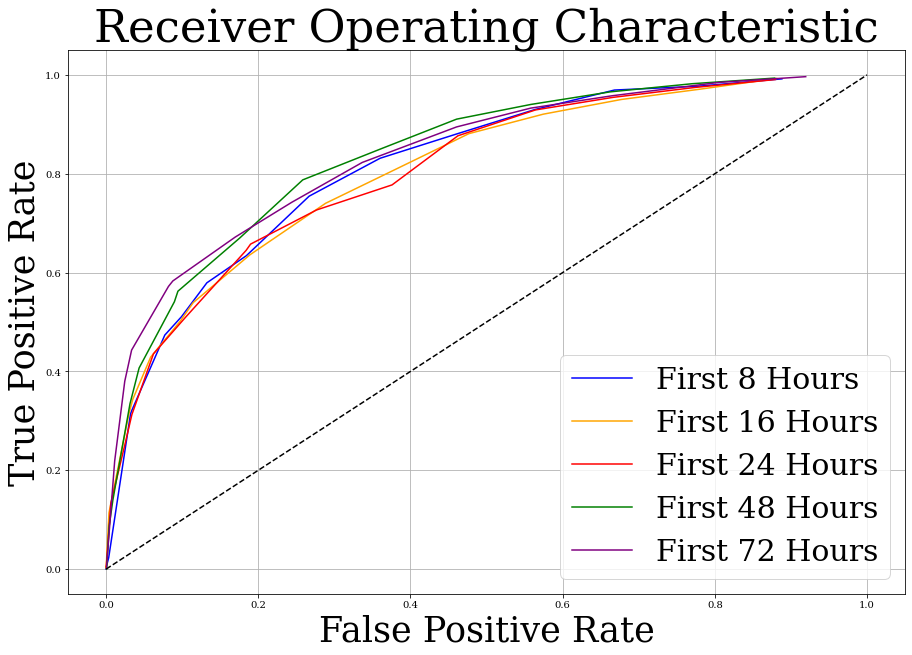

In [23]:
"""
AUC figure that shows first 8h, 16h, 24h, 48h, 72h
"""
pyplot.figure(figsize=(15, 10))
plt.grid(True) # shows the grid
plt.xlabel('False Positive Rate', fontsize=35) # Print X title
plt.ylabel('True Positive Rate',fontsize=35) # Print Y title
plt.title("Receiver Operating Characteristic", fontsize=45)

x1, y1 = eight_hour_data.T
x2, y2 = sixteen_hour_data.T
x3, y3 = twenty_four_hour_data.T
x4, y4 = forty_eight_hour_data.T
x5, y5 = seventy_two_hour_data.T
x6, y6 = middle_data.T

plt.plot(x1, y1, label='First 8 Hours', color="blue")
plt.plot(x2, y2, label='First 16 Hours', color="orange")
plt.plot(x3, y3, label='First 24 Hours', color="red")
plt.plot(x4, y4, label='First 48 Hours', color="green")
plt.plot(x5, y5, label='First 72 Hours', color="purple")
plt.plot(x6, y6, label='_nolegend_', color="black", linestyle = '--')
plt.legend() # Prints the label

font = font_manager.FontProperties(family='serif', style='normal', size=30)
plt.legend(prop=font)


plt.show()

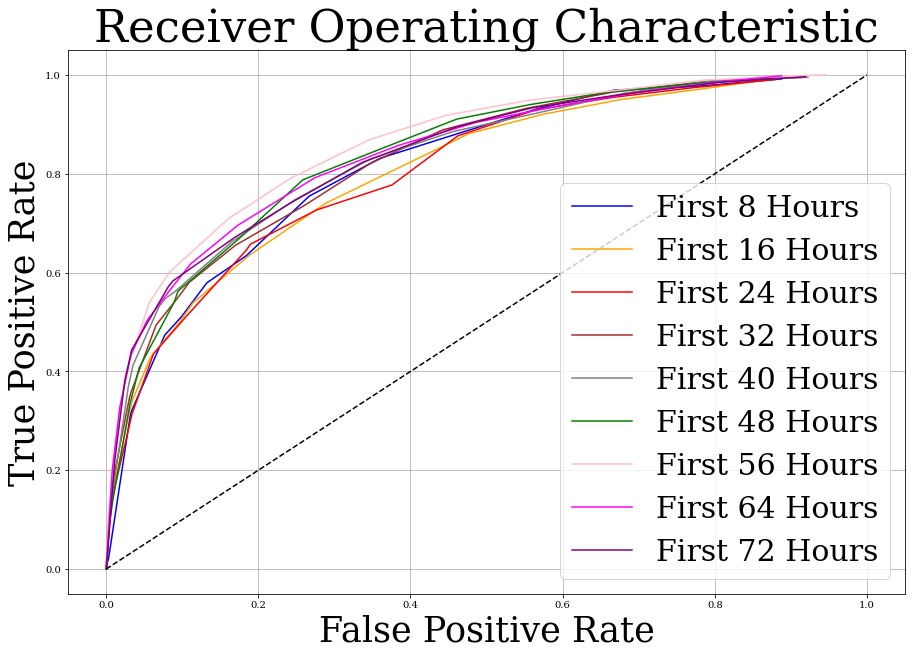

In [22]:
"""
AUC figure that shows first 8h, 16h, 24h, 32h, 40h, 48h, 56h, 64h, 72h
"""
pyplot.figure(figsize=(15, 10))
plt.grid(True) # shows the grid
plt.xlabel('False Positive Rate', fontsize=35) # Print X title
plt.ylabel('True Positive Rate',fontsize=35) # Print Y title
plt.title("Receiver Operating Characteristic", fontsize=45)

x1, y1 = eight_hour_data.T
x2, y2 = sixteen_hour_data.T
x3, y3 = twenty_four_hour_data.T
x4, y4 = thirty_two_hour_data.T
x5, y5 = forty_hour_data.T
x6, y6 = forty_eight_hour_data.T
x7, y7 = fifty_six_hour_data.T
x8, y8 = sixty_four_hour_data.T
x9, y9 = seventy_two_hour_data.T
x10, y10 = middle_data.T

plt.plot(x1, y1, label='First 8 Hours', color="blue")
plt.plot(x2, y2, label='First 16 Hours', color="orange")
plt.plot(x3, y3, label='First 24 Hours', color="red")
plt.plot(x4, y4, label='First 32 Hours', color="brown")
plt.plot(x5, y5, label='First 40 Hours', color="gray")
plt.plot(x6, y6, label='First 48 Hours', color="green")
plt.plot(x7, y7, label='First 56 Hours', color="pink")
plt.plot(x8, y8, label='First 64 Hours', color="magenta")
plt.plot(x9, y9, label='First 72 Hours', color="purple")
plt.plot(x10, y10, label='_nolegend_', color="black", linestyle = '--')
plt.legend() # Prints the label

font = font_manager.FontProperties(family='serif', style='normal', size=30)
plt.legend(prop=font)


plt.show()

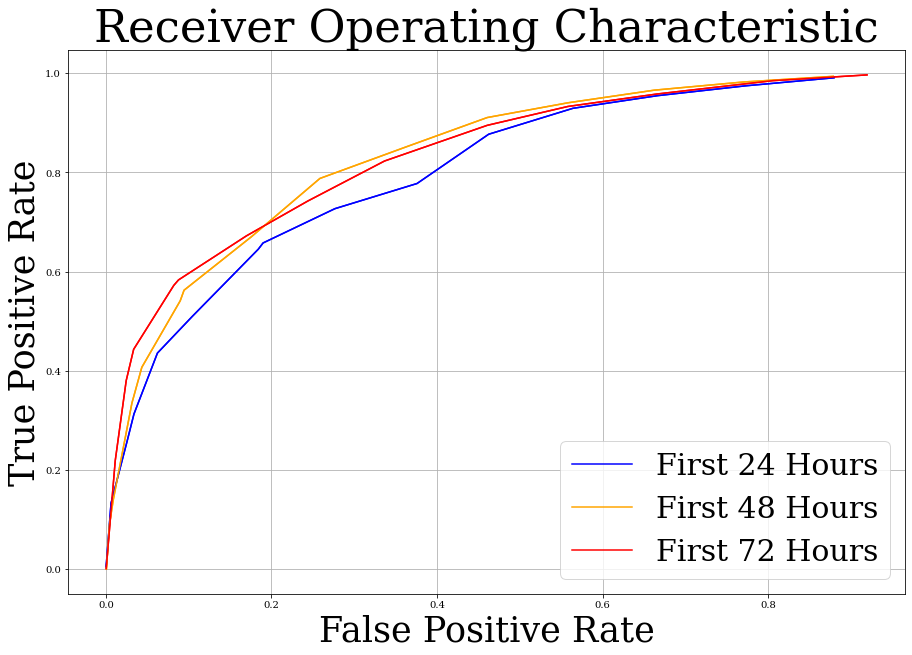

In [5]:
pyplot.figure(figsize=(15, 10))
plt.grid(True) # shows the grid
plt.xlabel('False Positive Rate', fontsize=35) # Print X title
plt.ylabel('True Positive Rate',fontsize=35) # Print Y title
plt.title("Receiver Operating Characteristic", fontsize=45)

x1, y1 = twenty_four_hour_data.T
x2, y2 = forty_eight_hour_data.T
x3, y3 = seventy_two_hour_data.T
#x4, y4 = ninety_six_hour_data.T

plt.plot(x1, y1, label='First 24 Hours', color="blue")
plt.plot(x2, y2, label='First 48 Hours', color="orange")
plt.plot(x3, y3, label='First 72 Hours', color="red")
#plt.plot(x4, y4, label='First 96 Hours', color="green")
plt.legend() # Prints the label

font = font_manager.FontProperties(family='serif', style='normal', size=30)
plt.legend(prop=font)


plt.plot(x1,y1, color="blue")
plt.plot(x2,y2, color="orange")
plt.plot(x3,y3, color="red")
#plt.plot(x4,y4, color="green")


plt.show()